# Exploring the Data

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [29]:
df = pd.read_csv("data.csv")
df.head()

,tech_company,benefits,workplace_resources,mh_employer_discussion,mh_coworker_discussion,medical_coverage,mental_health,mh_share,age,gender,country
0,Yes,No,I don't know,No,Yes,Yes,Possibly,5,27.0,Female,United Kingdom
1,Yes,Yes,No,No,Yes,Yes,Possibly,4,31.0,Male,United Kingdom
2,Yes,I don't know,No,Yes,Yes,No,Yes,5,36.0,Male,United States of America
3,Yes,Yes,I don't know,Yes,Yes,Yes,Yes,10,22.0,Male,United States of America
4,Yes,Yes,No,No,Yes,Yes,Yes,8,36.0,Female,United States of America


### Preliminary visualizations

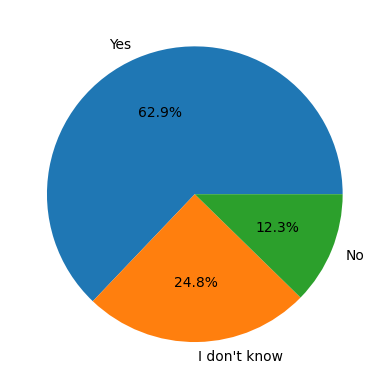

In [30]:
benefits = df["benefits"].value_counts()

plt.pie(benefits, labels=benefits.index, autopct="%1.1f%%")
plt.show()

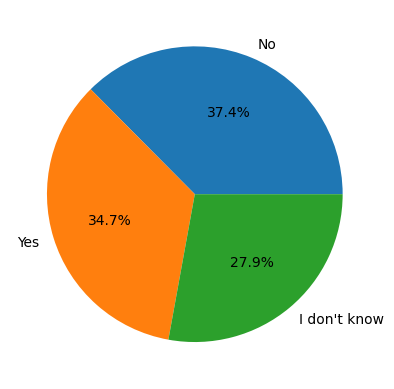

In [31]:
resources = df["workplace_resources"].value_counts()

plt.pie(resources, labels=resources.index, autopct="%1.1f%%")
plt.show()

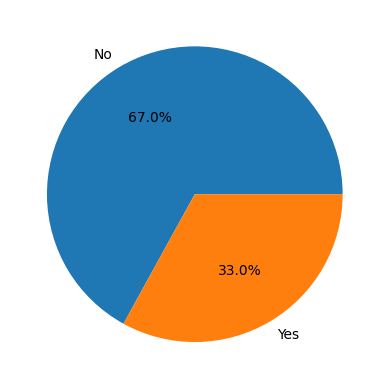

In [32]:
employer_discussion = df["mh_employer_discussion"].value_counts()

plt.pie(employer_discussion, labels=employer_discussion.index, autopct="%1.1f%%")
plt.show()

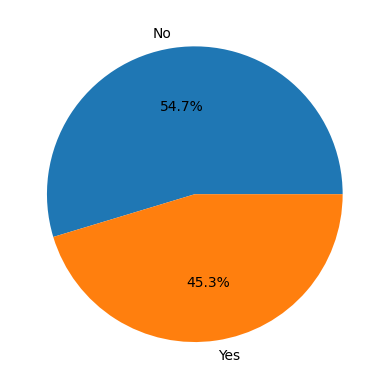

In [33]:
coworker_discussion = df["mh_coworker_discussion"].value_counts()

plt.pie(coworker_discussion, labels=coworker_discussion.index, autopct="%1.1f%%")
plt.show()

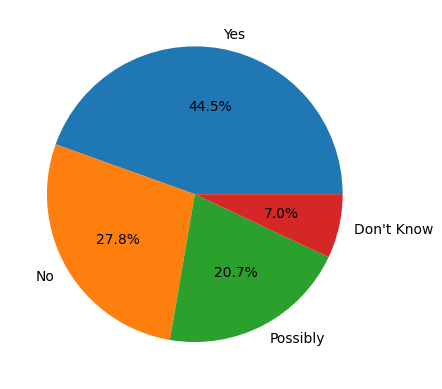

In [34]:
mental_health = df["mental_health"].value_counts()

plt.pie(mental_health, labels=mental_health.index, autopct="%1.1f%%")
plt.show()

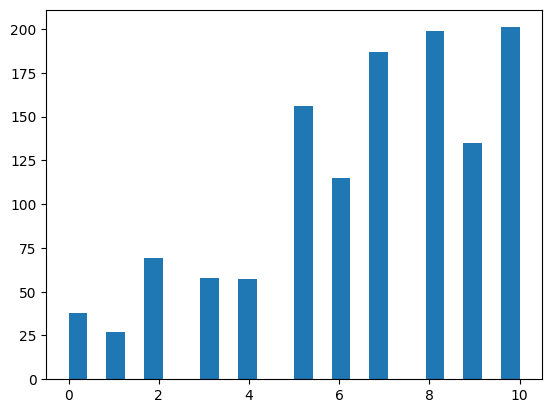

In [35]:
plt.hist(df['mh_share'], bins=24)
plt.show()

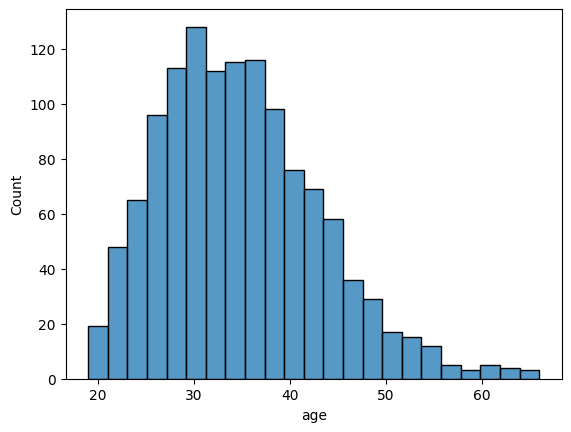

In [36]:
sns.histplot(df, x="age")
plt.show()

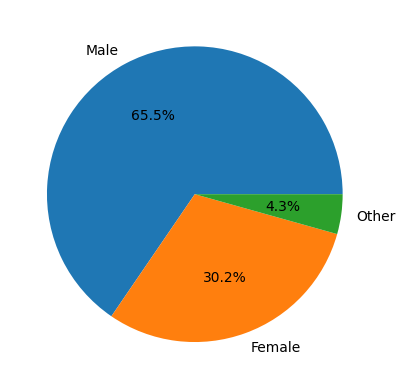

In [37]:
gender = df["gender"].value_counts()

plt.pie(gender, labels=gender.index, autopct="%1.1f%%")
plt.show()

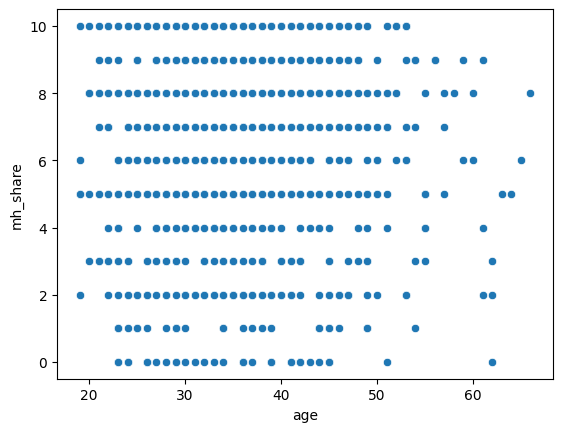

In [38]:
sns.scatterplot(df, x="age", y="mh_share")
plt.show()

### Data transformations

<function matplotlib.pyplot.show(close=None, block=None)>

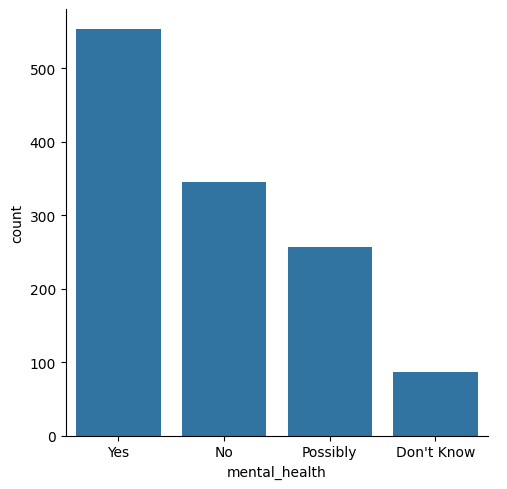

In [39]:
mental_health = df["mental_health"].value_counts().reset_index()
mental_health.columns = ["mental_health", "count"]

sns.catplot(mental_health, x="mental_health", y="count", kind="bar")
plt.show

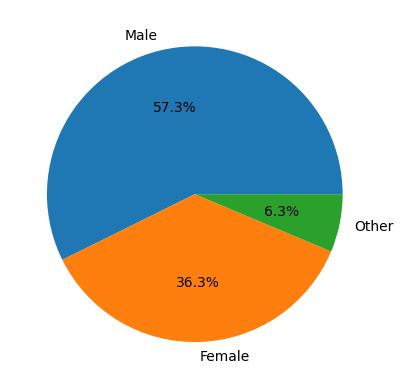

In [40]:
male_with_mental_health = df[(df["mental_health"] == 'Yes') & (df["gender"] == 'Male')]
female_with_mental_health = df[(df["mental_health"] =='Yes') & (df["gender"] == 'Female')]
other_with_mental_health = df[(df["mental_health"] =='Yes') & (df["gender"] == 'Other')]

sizes = [
    male_with_mental_health['gender'].shape[0],
    female_with_mental_health['gender'].shape[0],
    other_with_mental_health['gender'].shape[0]
]
labels = ['Male', 'Female', 'Other']

plt.pie(sizes, labels = labels, autopct = '%1.1f%%')
plt.show()

### Different plot types

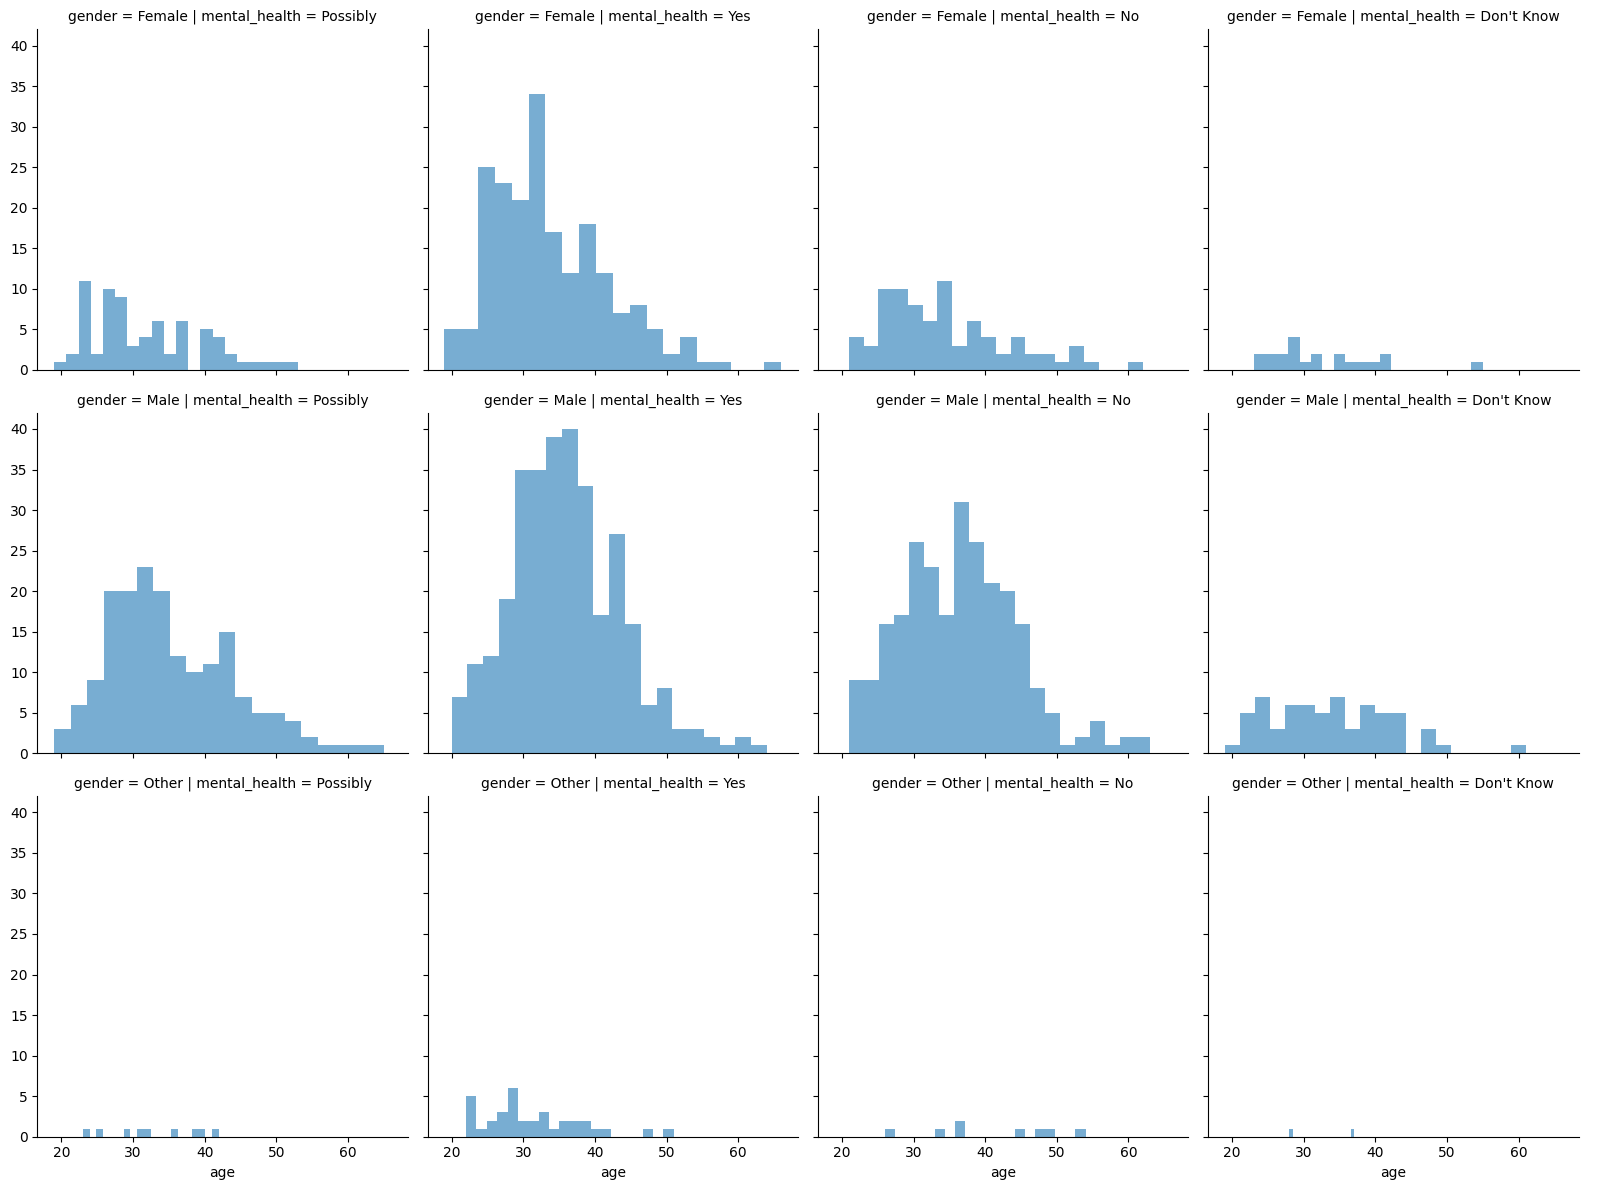

In [41]:
g = sns.FacetGrid(df, row = 'gender', col = 'mental_health', height = 4)
g.map(plt.hist, 'age', bins = 20, alpha = 0.6)
g.add_legend()
plt.show()

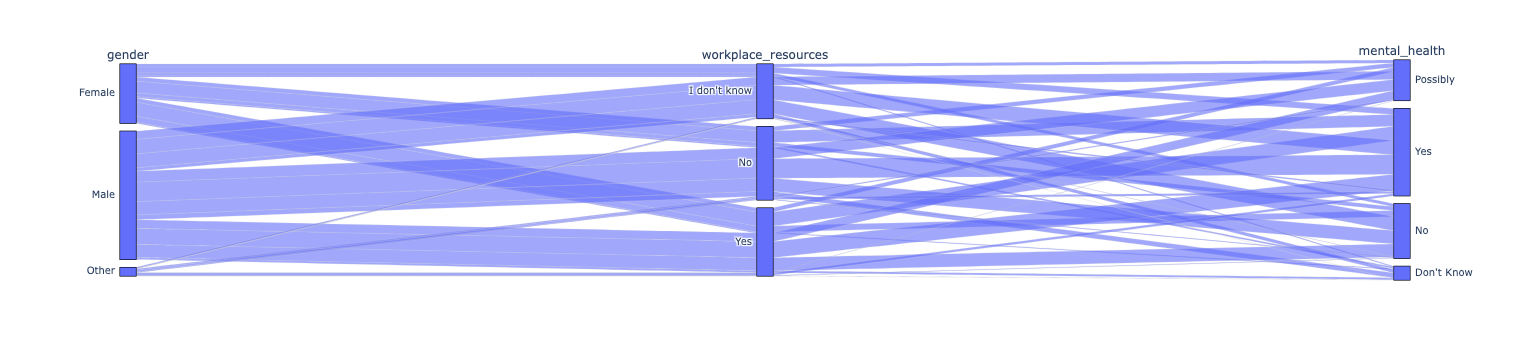

In [42]:
px.parallel_categories(df, 
        dimensions=["gender", "workplace_resources", "mental_health"])